# 이차 판별 분석(QDA)
**이차판별분석의 정의**  
- k(범주의 수)와 관계없이 공통 공분산 구조에 대한 가정을 만족하지 못하는 경우에 QDA 적용
    - 즉, Y의 범주별로 서로 다른 공분산 구조를 가진 경우에 활용 가능  
    
**LDA와 QDA의 비교**  
- LDA의 결정 경계는 선형으로 가정하고 있어 서로 다른 공분산 분류에 어려움이 있음 (첫번째 그림)
    - 단, LDA도 같은 공분산의 비선형 분류 가능(두번째 그림)
        - 변수의 제곱을 한 추가적인 변수들을 통해 보완
- QDA는 서로 다른 공분산 데이터 분류 가능(세번째 그림 참고)
    - 상대적 장점 비선형 분류 가능
- QDA는 서로 다른 공분산 데이터 분류를 위해 샘플이 많이 필요함
    - 상대적 단점: 설명 변수의 개수가 많을 경우, 추정해야 하는 모수가 많아짐
        - 즉, 연산량이 큼  
  
![image](https://user-images.githubusercontent.com/70187490/132194683-e169fca4-7ce3-44a0-94de-d5f53bea8e40.png)
**QDA: 클래스별 서로 다른 모수를 갖는 정규분포 분석**  
- 예를 들어 $y$가 1, 2, 3이라는 3개의 클래스를 가지고 각 클래스에서의 $x$의 확률분포가 다음과 같은 기대값과 공분산 행렬을 가진다고 가정하자
$$\mu_1 = \begin{bmatrix}0 \\ 0 \end{bmatrix}, \mu_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \mu_3 = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$$
$$\sum_1 = \begin{bmatrix} 0.7 \ \ \ \ 0 \\ 0 \ \ \ \ 0.7 \end{bmatrix}, \sum_2 = \begin{bmatrix} 0.8 \ \ \ \ 0.2 \\ 0.2 \ \ \ \ 0.8 \end{bmatrix},\sum_3 = \begin{bmatrix} 0.8 \ \ \ \ 0.2 \\ 0.2 \ \ \ \ 0.8 \end{bmatrix}$$
- $y$의 사전 확률은 다음과 같이 동일하다
$$P(Y=1) = P(Y=2) = P(Y=3)=\frac{1}{3}$$
![image](https://user-images.githubusercontent.com/70187490/132197238-a8675f04-c1cd-4b9b-9891-7978b291ab78.png)
![image](https://user-images.githubusercontent.com/70187490/132197305-e7ac2994-baea-4bd3-b6bd-7e23fa6f3b37.png)

In [1]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset('iris')
X = iris.drop('species', axis=1)
y = iris['species']
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [2]:
from sklearn.preprocessing import LabelEncoder

classle = LabelEncoder()
y=classle.fit_transform(iris['species'].values)
pd.Series(y).unique()

array([0, 1, 2])

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cqd = QuadraticDiscriminantAnalysis(store_covariance=True)

cqd.fit(X_train, y_train)
y_train_pred = cqd.predict(X_train)
y_test_pred = cqd.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9809523809523809
0.9777777777777777


array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]], dtype=int64)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

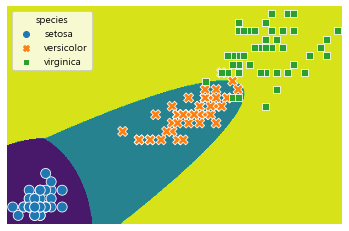

In [6]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array(iris[['petal_length', 'petal_width']])
y = iris['species']
y = np.where(y=='setosa', 0, np.where(y=='versicolor', 1, 2))

cqd = QuadraticDiscriminantAnalysis(store_covariance=True)
cqd.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), 
                     np.arange(y_min, y_max, 0.01))
XY = np.c_[xx.ravel(), yy.ravel()]
pred_cqd = cqd.predict(XY)
Z = pred_cqd.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.axis('off')

sns.scatterplot(x='petal_length', 
                y='petal_width', 
                hue='species', 
                style='species', 
                s=100, 
                data=iris)

출처:  
[세종대. 최유경 교수 6주차 판별분석 기계학습 Part2](https://youtu.be/WdxIxchlBvo)